In [12]:
# Iris Data Set을 이용해서
# SVM과 Regression(Logistic)을 이용해서 분류모델을
# 만들고 성능을 비교해 보아요!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import classification_report

In [11]:
# Raw Data Loading
iris = load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['label'] = iris['target']
display(df.head())

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [63]:
# Feature Engineering & Data Preprocessing
# 특정 feature(독립변수)를 제거하는 경우
# (상관관계가 없을 때, NaN이 너무 많을 때, 다른 feature와 중복될 때)
# 데이터 전처리 (1, 2, 5, 6 필수!)
# 1. 결측치 처리 (없음).
# 2. 이상치 처리 (없음).
# 3. 중복데이터 처리
# 4. 불균형 데이터 처리
# 5. 정규화
x_data = df.drop('label', axis=1, inplace=False).values
t_data = df['label'].values
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 6. 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm, t_data,
                 test_size=0.2, stratify=t_data)

In [64]:
# Logistic Regression Model 구현
logistic_model = LogisticRegression()
logistic_model.fit(x_data_train_norm, t_data_train)
print(classification_report(t_data_test, logistic_model.predict(x_data_test_norm)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.73      0.80      0.76        10
           2       0.78      0.70      0.74        10

    accuracy                           0.83        30
   macro avg       0.84      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30



In [65]:
# Support Vector Machine Model 구현 C=1, gamma='scale'
svm_model = SVC(C=1, kernel='rbf')
svm_model.fit(x_data_train_norm, t_data_train)
print(classification_report(t_data_test, svm_model.predict(x_data_test_norm)))

# Support Vector Machine Model 구현 C=10, gamma='scale'
svm_model = SVC(C=10, kernel='rbf')
svm_model.fit(x_data_train_norm, t_data_train)
print(classification_report(t_data_test, svm_model.predict(x_data_test_norm)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.75      0.90      0.82        10
           2       0.88      0.70      0.78        10

    accuracy                           0.87        30
   macro avg       0.88      0.87      0.87        30
weighted avg       0.88      0.87      0.87        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.75      0.90      0.82        10
           2       0.88      0.70      0.78        10

    accuracy                           0.87        30
   macro avg       0.88      0.87      0.87        30
weighted avg       0.88      0.87      0.87        30



In [66]:
# 좋은 Hyperparameter를 찾기위해
# GridSearchCV를 사용해볼거에요! - sklearn Model에 대해서만 사용가능!
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'kernel' : ['linear'],
    'C' : [0.1, 0.5, 1, 10, 100]
}, {
    'kernel' : ['rbf'],
    'C' : [0.1, 0.05, 0.7, 1, 5, 10, 100],
    'gamma' : [0.001, 0.01, 0.1, 1]
}]

# Support Vector Machine Model 구현 GridSearchCV
svm_model = SVC()
grid_search = GridSearchCV(svm_model,
                           param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1)

grid_search.fit(x_data_train_norm, t_data_train)

# 가장 좋은 parameter는 어떤 것이고 그때 score는 얼마인가요?
print(f'가장 좋은 param : {grid_search.best_params_}')
print(f'그때의 score : {grid_search.best_score_}')
print(classification_report(t_data_test, grid_search.predict(x_data_test_norm)))

Fitting 5 folds for each of 33 candidates, totalling 165 fits
가장 좋은 param : {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
그때의 score : 0.9833333333333334
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.77      1.00      0.87        10
           2       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



In [70]:
# DecisionTree - Entropy
import numpy as np

# 영역이 나누어지지 않은 경우
result = -(10/16 * np.log2(10/16) + 6/16 * np.log2(6/16))
print(result) # 0.954434002924965

# 영역이 나누어진 경우
result = -0.5 * (7/8 * np.log2(7/8) + 1/8 * np.log2(1/8)) -0.5 * (3/8 * np.log2(3/8) + 5/8 * np.log2(5/8)) # 0.7489992230622807
print(result) # 0.7489992230622807

0.954434002924965
0.7489992230622807


In [80]:
# 강의 자료 경기 진행 데이터
import numpy as np

# 영역이 나누어지지 않은 경우 Y : 9, N : 5
result = -(9/14 * np.log2(9/14) + 5/14 * np.log2(5/14))
print(result) # 0.9402859586706311

# Wind를 기준으로 영역을 나눈 경우 weak(Y : 6, N : 2), strong(Y : 3, N : 3)
result = -8/14 * (6/8 * np.log2(6/8) + 2/8 * np.log2(2/8)) -6/14 * (3/6 * np.log2(3/6) + 3/6 * np.log2(3/6))
print(result) # 0.8921589282623617

# Humidity를 기준으로 영역을 나눈 경우 High(Y : 3, N : 4), Normal(Y : 6, N : 1)
result = -7/14 * (3/7 * np.log2(3/7) + 4/7 * np.log2(4/7)) -7/14 * (6/7 * np.log2(6/7) + 1/7 * np.log2(1/7))
print(result) # 0.7884504573082896

# Outlook를 기준으로 영역을 나눈 경우 Overcast(Y : 4, N : 0), Sunny(Y : 2, N : 3), Rain(Y : 3, N : 2)
result = -5/14 * (2/5 * np.log2(2/5) + 3/5 * np.log2(3/5)) -5/14 * (3/5 * np.log2(3/5) + 2/5 * np.log2(2/5))
print(result) # 0.6935361388961918

0.9402859586706311
0.8921589282623617
0.7884504573082896
0.6935361388961918


In [83]:
# 이번에는 Decision Tree를 이용해서
# Iris Data Set에 대한 분류모델을 만들어보아요
# 꽃받침의 길이와 너비, 꽃잎의 길이와 너비 총 4개의 독립변수를 이용.
# 종속변수 3분류의 Iris 품종이 나와요
# 독립변수를 2개만 이용해서 2차원 평면에 결정경계를 그려볼거에요!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report

In [90]:
# Raw Data Loading
iris = load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['label'] = iris['target']

display(df.head())

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [91]:
# 결측치 처리
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
label,0


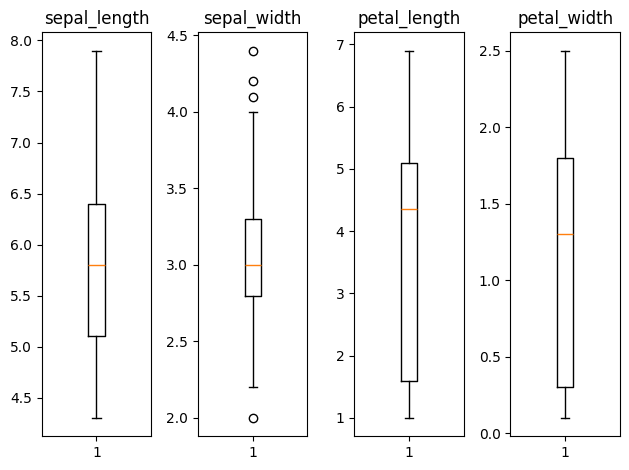

In [92]:
# 이상치 처리
fig = plt.figure()
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

ax1.set_title('sepal_length')
ax2.set_title('sepal_width')
ax3.set_title('petal_length')
ax4.set_title('petal_width')

ax1.boxplot(df['sepal_length'])
ax2.boxplot(df['sepal_width'])
ax3.boxplot(df['petal_length'])
ax4.boxplot(df['petal_width'])

plt.tight_layout()

plt.show()

In [93]:
# 중복데이터 처리
print(df.duplicated().sum()) # 1
df = df.drop_duplicates()
print(df.shape) # (150, 5) -> (149, 5)

1
(149, 5)


In [102]:
# 상관분석
print(df.corr())

              sepal_length  sepal_width  petal_length  petal_width     label
sepal_length      1.000000    -0.118129      0.873738     0.820620  0.786971
sepal_width      -0.118129     1.000000     -0.426028    -0.362894 -0.422987
petal_length      0.873738    -0.426028      1.000000     0.962772  0.949402
petal_width       0.820620    -0.362894      0.962772     1.000000  0.956514
label             0.786971    -0.422987      0.949402     0.956514  1.000000


In [94]:
# 데이터 정규화
x_data = df[['sepal_length', 'petal_length']].values
t_data = df['label'].values

scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

In [99]:
# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data)

In [100]:
# 1. Regression 모델 구현
regression_model = LogisticRegression()
regression_model.fit(x_data_train_norm, t_data_train)

LogisticRegression()

In [101]:
# 1-1. 정확도 출력
print(classification_report(t_data_test, regression_model.predict(x_data_test_norm))) # 0.82

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.82      0.60      0.69        15
           2       0.72      0.87      0.79        15

    accuracy                           0.82        45
   macro avg       0.83      0.82      0.82        45
weighted avg       0.83      0.82      0.82        45



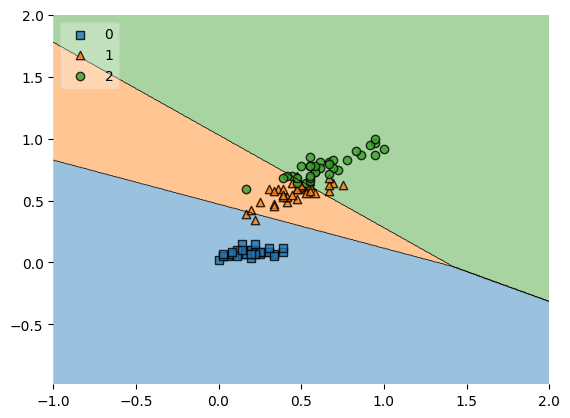

In [105]:
# 1-2. 그래프 출력
plot_decision_regions(X=x_data_train_norm,
                      y=t_data_train,
                      clf=regression_model,
                      legend=2)
plt.show()

In [106]:
# 2. SVC 모델 구현
svm_model = SVC()
svm_model.fit(x_data_train_norm, t_data_train)

SVC()

In [107]:
# 2-1. 정확도 출력
print(classification_report(t_data_test, svm_model.predict(x_data_test_norm))) # 0.96

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.94        15
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



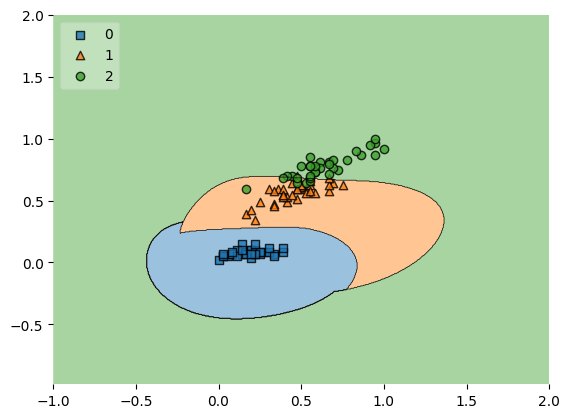

In [108]:
# 2-2. 그래프 출력
plot_decision_regions(X=x_data_train_norm,
                      y=t_data_train,
                      clf=svm_model,
                      legend=2)
plt.show()

In [115]:
# 3. KNN 모델 구현
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_data_train_norm, t_data_train)

KNeighborsClassifier(n_neighbors=1)

In [116]:
# 3-1. 정확도 출력
print(classification_report(t_data_test, knn_model.predict(x_data_test_norm))) # 1.00

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



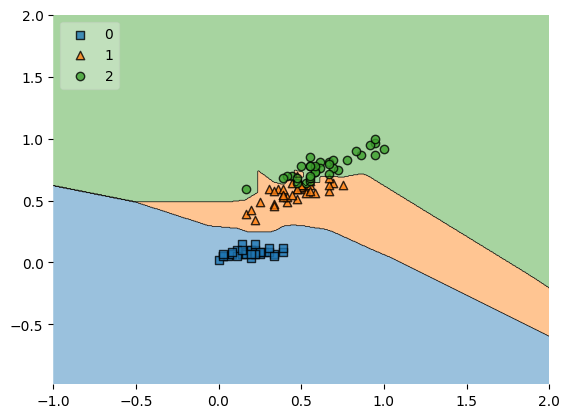

In [117]:
# 3-2. 그래프 출력
plot_decision_regions(X=x_data_train_norm,
                      y=t_data_train,
                      clf=knn_model,
                      legend=2)
plt.show()

In [109]:
# 4. Decision Tree 모델 구현
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_data_train_norm, t_data_train)

DecisionTreeClassifier()

In [110]:
# 4-1. 정확도 출력
print(classification_report(t_data_test, decision_tree_model.predict(x_data_test_norm))) #  0.93

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.83      1.00      0.91        15
           2       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



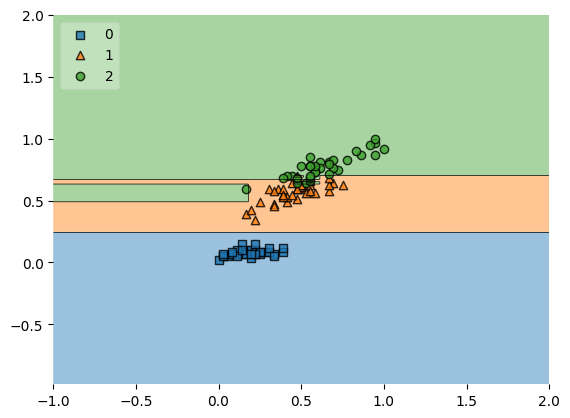

In [111]:
# 4-2. 그래프 출력
plot_decision_regions(X=x_data_train_norm,
                      y=t_data_train,
                      clf=decision_tree_model,
                      legend=2)
plt.show()

In [118]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report

In [2]:
# MNIST Data Set 사용
df = pd.read_csv('/content/drive/MyDrive/KDT/data/Digit Recognizer/train.csv')
display(df.head())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# 데이터 정규화
x_data = df.drop('label', axis=1, inplace=False).values
t_data = df['label'].values

scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

In [4]:
# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data)

In [5]:
# 1. Regression Model
regression_model = LogisticRegression()
regression_model.fit(x_data_train_norm, t_data_train)

print(classification_report(t_data_test, regression_model.predict(x_data_test_norm))) # 0.92

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1240
           1       0.95      0.97      0.96      1405
           2       0.90      0.89      0.90      1253
           3       0.89      0.90      0.90      1305
           4       0.92      0.92      0.92      1222
           5       0.88      0.86      0.87      1139
           6       0.94      0.95      0.95      1241
           7       0.92      0.93      0.93      1320
           8       0.90      0.87      0.88      1219
           9       0.88      0.89      0.88      1256

    accuracy                           0.92     12600
   macro avg       0.91      0.91      0.91     12600
weighted avg       0.92      0.92      0.92     12600



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
# 2. SVC Model
svm_model = SVC()
svm_model.fit(x_data_train_norm, t_data_train)

print(classification_report(t_data_test, svm_model.predict(x_data_test_norm))) # 0.97

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1240
           1       0.99      0.99      0.99      1405
           2       0.97      0.98      0.97      1253
           3       0.96      0.96      0.96      1305
           4       0.96      0.97      0.97      1222
           5       0.97      0.97      0.97      1139
           6       0.98      0.98      0.98      1241
           7       0.97      0.98      0.97      1320
           8       0.98      0.96      0.97      1219
           9       0.96      0.95      0.96      1256

    accuracy                           0.97     12600
   macro avg       0.97      0.97      0.97     12600
weighted avg       0.97      0.97      0.97     12600



In [7]:
# 3. KNN Model
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_data_train_norm, t_data_train)

print(classification_report(t_data_test, knn_model.predict(x_data_test_norm))) # 0.96

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1240
           1       0.97      0.99      0.98      1405
           2       0.98      0.96      0.97      1253
           3       0.95      0.96      0.96      1305
           4       0.96      0.96      0.96      1222
           5       0.96      0.96      0.96      1139
           6       0.98      0.99      0.98      1241
           7       0.96      0.97      0.96      1320
           8       0.99      0.92      0.95      1219
           9       0.92      0.95      0.93      1256

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600



In [11]:
# 4.Decision Tree Model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_data_train_norm, t_data_train)

print(classification_report(t_data_test, decision_tree_model.predict(x_data_test_norm))) # 0.85

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1240
           1       0.92      0.94      0.93      1405
           2       0.83      0.83      0.83      1253
           3       0.82      0.80      0.81      1305
           4       0.83      0.83      0.83      1222
           5       0.79      0.79      0.79      1139
           6       0.88      0.87      0.87      1241
           7       0.88      0.89      0.89      1320
           8       0.79      0.78      0.78      1219
           9       0.80      0.80      0.80      1256

    accuracy                           0.85     12600
   macro avg       0.84      0.84      0.84     12600
weighted avg       0.85      0.85      0.85     12600

